In [19]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Define data folder path
train_folder = r"/Users/vpriyanca/Downloads/ML Project_1_2/images_ER/images/train"

# Define list of class labels
class_labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]


# Define empty lists for images and labels
x_train = []
y_train = []

def preprocess_image(image_path):

    # Load the image file
    img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))

    # Convert the image to a numpy array
    img_arr = img_to_array(img)

    # Normalize the pixel values
    img_arr = img_arr / 255.0

    return img_arr


# Load and preprocess images in train set
for label in class_labels:
    folder_path = os.path.join(train_folder, label)
    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        img_arr = preprocess_image(img_path)
        x_train.append(img_arr)
        y_train.append(label)

# Convert labels to integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# One-hot encode labels
onehot_encoder = OneHotEncoder(sparse_output=False, categories="auto")
y_train = onehot_encoder.fit_transform(y_train.reshape(-1, 1))

# Convert data to ndarray and tensor shapes
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = y_train.astype("float32")

# Split data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print shape of data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (23056, 48, 48, 1)
y_train shape: (23056, 7)
x_test shape: (5765, 48, 48, 1)
y_test shape: (5765, 7)


In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 22, 22, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 18, 18, 64)        36928     
                                                      

In [18]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Calculate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


Epoch 1/10
721/721 [==============================] - 33s 46ms/step - loss: 1.1363 - accuracy: 0.5690 - val_loss: 1.1519 - val_accuracy: 0.5618
Epoch 2/10
721/721 [==============================] - 34s 47ms/step - loss: 1.1229 - accuracy: 0.5736 - val_loss: 1.1541 - val_accuracy: 0.5624
Epoch 3/10
721/721 [==============================] - 34s 46ms/step - loss: 1.1240 - accuracy: 0.5723 - val_loss: 1.1531 - val_accuracy: 0.5679
Epoch 4/10
721/721 [==============================] - 34s 47ms/step - loss: 1.1135 - accuracy: 0.5740 - val_loss: 1.1512 - val_accuracy: 0.5618
Epoch 5/10
721/721 [==============================] - 34s 47ms/step - loss: 1.1122 - accuracy: 0.5784 - val_loss: 1.1413 - val_accuracy: 0.5733
Epoch 6/10
721/721 [==============================] - 34s 47ms/step - loss: 1.1049 - accuracy: 0.5756 - val_loss: 1.1523 - val_accuracy: 0.5641
Epoch 7/10
721/721 [==============================] - 34s 47ms/step - loss: 1.1096 - accuracy: 0.5786 - val_loss: 1.1441 - val_accuracy:

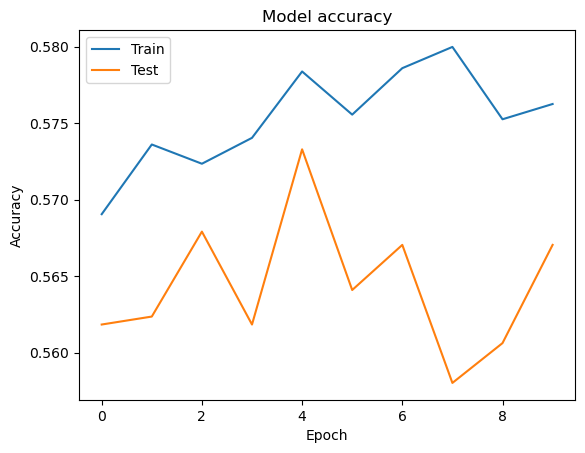

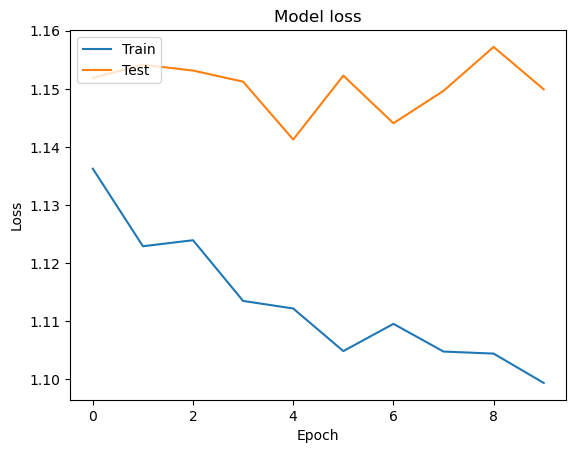

181/181 - 2s - loss: 1.1499 - accuracy: 0.5670 - 2s/epoch - 12ms/step
Test accuracy: 0.5670424699783325
181/181 [==============================] - 2s 12ms/step


In [20]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

# Generate predictions for the test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

[[ 375    2   38   76  121  133   24]
 [  31   18    8    9    2   23    2]
 [ 119    1  183   75  119  206  120]
 [  50    1   16 1214  108  100   18]
 [  65    0   36  104  592  180   16]
 [ 109    0   70   86  231  446   13]
 [  21    0   51   56   38   18  441]]


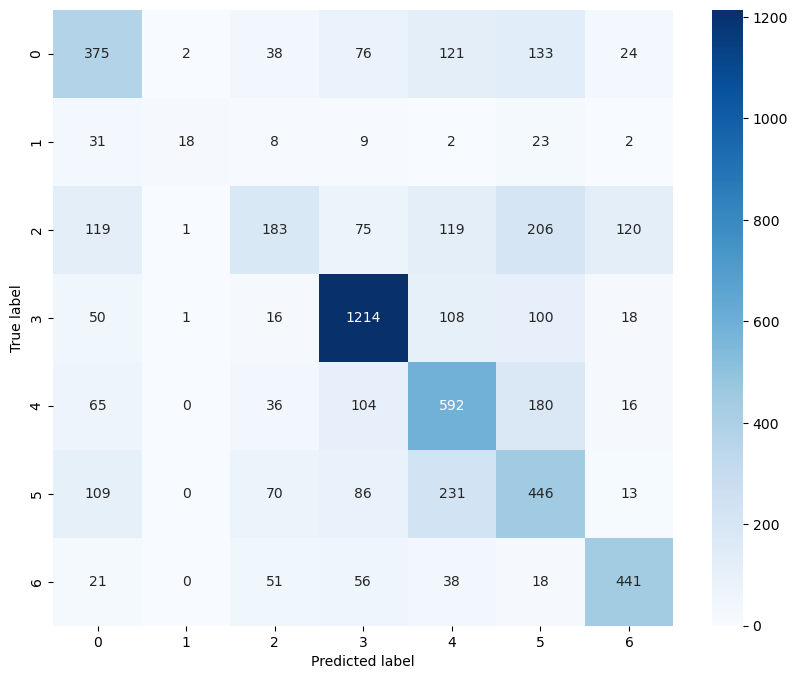

In [21]:
# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test_labels, y_pred_labels)
print(confusion_mtx)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()